## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [135]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [136]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [137]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [138]:
print("Number of duplicated users: " ,sum(df.user_id.duplicated()))
print("Number of unique users: ", df.user_id.unique().shape[0])

Number of duplicated users:  3894
Number of unique users:  290584


d. The proportion of users converted.

In [139]:
converted=df[df['converted'] ==1]
print(converted.shape)
proportion=converted.shape[0]/df['converted'].shape[0]
print("The proportion of users converted: ",proportion)

(35237, 5)
The proportion of users converted:  0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [140]:
print(df['landing_page'].unique())
not_matched=df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
not_matched.shape[0]
print(not_matched.shape[0])
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]



['old_page' 'new_page']
3893


3893

f. Do any of the rows have missing values?

In [141]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

##### It appears that are no missing values 

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [142]:
df2=df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]

In [143]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [144]:
unique_user_ids=df2.user_id.unique()
print("Total number of rows in df2: " , df2.shape[0])
print("Number of unique user ids : ",unique_user_ids.shape[0])

Total number of rows in df2:  290585
Number of unique user ids :  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [145]:
sum(df2.user_id.duplicated())
duplicated=df2[df2.user_id.duplicated()]
print(duplicated)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [146]:
duplicated=df2[df2.user_id.duplicated()]
print(duplicated)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [147]:
df2=df2[df2.user_id != 773192 ]
print("Duplicated user ids:  ", sum(df2.user_id.duplicated()))

Duplicated user ids:   0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [148]:
probalility_converted=df2.query('converted == 1').shape[0]/df2.shape[0]
print("Probability of converting regardless of page: ",probalility_converted)

Probability of converting regardless of page:  0.11959749882133504


b. Given that an individual was in the `control` group, what is the probability they converted?

In [149]:
probability_control_converted=df2.query('group == "control"')['converted'].mean()
print("The probability of converting given that an individual was in the control group: ",probability_control_converted
     )

The probability of converting given that an individual was in the control group:  0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [150]:
probability_treatment_converted=df2.query('group == "treatment"')['converted'].mean()
print("The probability of converting given that an individual was in the treatment group: ",probability_treatment_converted )

The probability of converting given that an individual was in the treatment group:  0.118808883139


d. What is the probability that an individual received the new page?

In [151]:
probability_new_page= df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
print(" the probability that an individual received the new page: ",probability_new_page)

 the probability that an individual received the new page:  0.5000602237570677


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.


No, there is no sufficient evidence to conclude that the new treatment page leads to more conversions
Only we calculated the number of indviduals received new page , the probability of conversion of individuals whether in treatment or control group .



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


##### H0 ===>  pnew <= pold     ===> pnew -pold <= 0 <br>
##### H1 ===> pnew>pold ====>  pnew-pold >0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [152]:
pnew_cr_under_null=df2.converted.mean()
print("Conversion rate  of  pnew  under the null : ",pnew_cr_under_null)



Conversion rate  of  pnew  under the null :  0.119597498821


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [153]:
pold_cr_under_null=df2.converted.mean()
print("Conversion rate  of  pold under the null : ",pold_cr_under_null)

Conversion rate  of  pold under the null :  0.119597498821


c. What is $n_{new}$, the number of individuals in the treatment group?

In [154]:
n_new=df2.query('group=="treatment"').user_id.nunique()+1
print("The number of individuals in the treatment group: " , n_new)


The number of individuals in the treatment group:  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [155]:
n_old=df2.query('group=="control"').user_id.nunique()
print("The number of individuals in the control group: ",n_old)

The number of individuals in the control group:  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [156]:
new_page_converted=np.random.binomial(1, p=pnew_cr_under_null, size=n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [157]:
old_page_converted=np.random.binomial(1,p= pold_cr_under_null, size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [158]:
diff = new_page_converted.mean() - old_page_converted.mean()
print(diff)

0.000706698631766


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [159]:
new_page_converted_2 = np.random.binomial(n_new,pnew_cr_under_null, 10000)
old_page_converted_2 = np.random.binomial(n_old, pold_cr_under_null, 10000)
p_diffs = new_page_converted_2/n_new - old_page_converted_2/n_old




i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   15.,   119.,   514.,  1488.,  2628.,  2641.,  1744.,   677.,
          156.,    18.]),
 array([ -4.41392494e-03,  -3.54530659e-03,  -2.67668824e-03,
         -1.80806989e-03,  -9.39451541e-04,  -7.08331904e-05,
          7.97785160e-04,   1.66640351e-03,   2.53502186e-03,
          3.40364021e-03,   4.27225856e-03]),
 <a list of 10 Patch objects>)

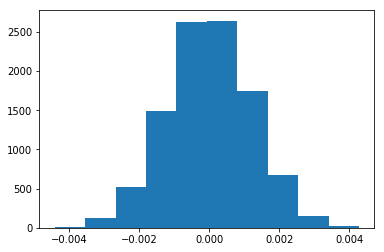

In [160]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [161]:
treatment_converted_rate=df2[df2.group=='treatment'].converted.mean()
control_coverted_rate=df2[df2.group=='control'].converted.mean()
obs_diff = treatment_converted_rate - control_coverted_rate
p_val = (p_diffs > obs_diff).mean()
p_val  #0.90849999999999997
print("P-value approximated: " , p_val)

P-value approximated:  0.905


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j , I have computed P-value of sampling distribution of differences , since P-value is 0.9 > 0.05,we fail to reject the null hypothesis that is p_new-p_old<=0 . p_new <= p_old
The conversion rate for the new page is either smaller than or equal to that of the old page.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [162]:
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore")
convert_old = df2[df2.landing_page=='old_page'].converted.sum()
convert_new = df2[df2.landing_page=='new_page'].converted.sum()
n_old = df2[df2.landing_page=='old_page'].shape[0]
n_new = df2[df2.landing_page=='new_page'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [163]:
test_statistic, p_value = sm.stats.proportions_ztest(np.array([convert_old, convert_new]), np.array([n_old, n_new]),alternative='smaller')
print("Test statisitic' Z-score' :" , test_statistic)
print("P-value: ", p_value)

Test statisitic' Z-score' : 1.31024085793
P-value:  0.904942816116


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score and p-value mean that the conversion rate of new page is less or equal that od old page so there is no statistical evidence to change web pages . Yes , they agree with the findings in parts j and k where  the conversion rate of new page is less or equal that of old page 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logisitic regression 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [164]:
df2['intercept']=1
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [165]:
model=sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [166]:
result.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-15 19:23 AIC:              212780.0972
No. Observations:   290583           BIC:              212801.2565
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3102  0.1901  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

p-value associated in ab_page is 0.1901 , it differs because of the difference in the hypothesis set up , in A/B testing we use one-tailed test , we are concerned with the change in just one direction away from our metric  
##### H0----> p_new - p_old <=0  <br>
##### H1----> p_new-p_old >0 <br>
but in regression case , we use two-tailed test , we are concerned with the change in in either direction of our  metric <br>
##### H0 ----> p_new -p_old=0
##### H1------> p_new-p_old != 0 <br>


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

p-value < 0.05 so we fail to reject H0 --> p_new -p_old=0 <br>
so the conversion rate of old page is equal to that of new page so there is no need to change  <br>
It is a good consider other factors that might influence a change in the conversion rate.<br>

The effect of inserting an additional feature into the model would depend among other factors on whether the variable is correlated with any of the already existing features, and/or with the response variable. In a case where there is a correlation, the added variable will  have negative effect on the overall quality of the model, if there is  no correlation is present , then the additional variable contributes positively towards uderstanding the model with more clarity.



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [169]:
df_countries=pd.read_csv("countries.csv")
df_countries.head()



,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [170]:
df2_new=df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df2_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [171]:
df2_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [175]:
df2_new[['CA', 'US']] = pd.get_dummies(df2_new.country)[['CA','US']]

model2 = sm.Logit(df2_new.converted, df2_new[['intercept', 'ab_page', 'CA', 'US']])
result2= model2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-15 19:55 AIC:              212780.8724
No. Observations:   290583           BIC:              212823.1910
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4148  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3062  0.1915  -0.0373   0.0075
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
US           -0.0099    0.0133    -0.7429  0.4575  -0.0359   0.0162
==================================================================

"""

p_value of CA and Us are 0.07 and 0.45 greater than 0.05 so the country column seems to have no influence on conversion

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [177]:
df2_new['CA_ab_page'] = df2_new['CA'] * df2_new['ab_page']
df2_new['US_ab_page'] = df2_new['US'] * df2_new['ab_page']

In [178]:
df2_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,CA_ab_page,US_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,0,0


In [179]:
model3 = sm.Logit(df2_new.converted, df2_new[['intercept','ab_page', 'CA', 'US', 'CA_ab_page', 'US_ab_page']])
result3= model3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-15 20:04 AIC:              212782.4080
No. Observations:   290583           BIC:              212845.8859
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290577           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA_ab_page   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
US_ab_page   -0.0314    0.0266    -1.1803  0.2379  -0.0835   0.0207
==================================================================

"""

p_value for nteraction variables are larger than  0.05 then conversion rate of pold and pnew are equal , <br>
The country from which a user visits a webpage  does not seem to influence the conversion <br>
Based on the A/B test and logistic regression, there is no evidence that the new page would improve the conversion rate of the e-commerce company.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [168]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0